In [1]:
!module load tensorflow
!hostname
#Based on: https://chroniclesofai.com/transfer-learning-with-keras-resnet-50/
#and https://github.com/nachi-hebbar/Transfer-Learning-ResNet-Keras/blob/main/ResNet_50.ipynb
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


tensorflow/2.5.0-cuda-system unloaded
tensorflow/2.5.0-cuda-system loaded
c208-13


In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
img_height,img_width=180,180
batch_size=128

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


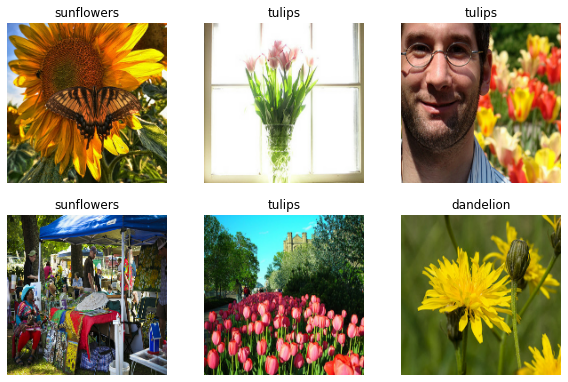

In [7]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))
resnet_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [9]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
23/23 [==============================] - 13s 298ms/step - loss: 1.3402 - accuracy: 0.6577 - val_loss: 0.5061 - val_accuracy: 0.8065
Epoch 2/10
23/23 [==============================] - 7s 238ms/step - loss: 0.3658 - accuracy: 0.8716 - val_loss: 0.3686 - val_accuracy: 0.8719
Epoch 3/10
23/23 [==============================] - 7s 239ms/step - loss: 0.2574 - accuracy: 0.9070 - val_loss: 0.3595 - val_accuracy: 0.8678
Epoch 4/10
23/23 [==============================] - 7s 241ms/step - loss: 0.1828 - accuracy: 0.9411 - val_loss: 0.3420 - val_accuracy: 0.8760
Epoch 5/10
23/23 [==============================] - 7s 239ms/step - loss: 0.1351 - accuracy: 0.9625 - val_loss: 0.3239 - val_accuracy: 0.8856
Epoch 6/10
23/23 [==============================] - 7s 237ms/step - loss: 0.0899 - accuracy: 0.9823 - val_loss: 0.3475 - val_accuracy: 0.8760
Epoch 7/10
23/23 [==============================] - 7s 238ms/step - loss: 0.0633 - accuracy: 0.9905 - val_loss: 0.3308 - val_accuracy: 0.8842
Epoch

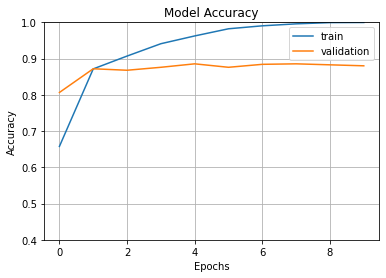

In [10]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()